In [49]:
import xarray as xr
import netCDF4

data_path = r"Z:\LOTOS\output\LE_v2.3.000_drydepo_20160814.nc"
original_data = xr.open_dataset(data_path, engine='h5netcdf')

original_data

<xarray.Dataset> Size: 15MB
Dimensions:         (longitude: 100, latitude: 140, nv: 2, longitude_crnr: 101,
                     latitude_crnr: 141, time: 24)
Coordinates:
  * longitude       (longitude) float32 400B -14.75 -14.25 ... 34.25 34.75
  * latitude        (latitude) float32 560B 35.12 35.38 35.62 ... 69.62 69.88
  * longitude_crnr  (longitude_crnr) float32 404B -15.0 -14.5 ... 34.5 35.0
  * latitude_crnr   (latitude_crnr) float32 564B 35.0 35.25 35.5 ... 69.75 70.0
  * time            (time) datetime64[ns] 192B 2016-08-14T01:00:00 ... 2016-0...
Dimensions without coordinates: nv
Data variables: (12/13)
    longitude_bnds  (longitude, nv) float32 800B ...
    latitude_bnds   (latitude, nv) float32 1kB ...
    o3_dflux        (time, latitude, longitude) float32 1MB ...
    so2_dflux       (time, latitude, longitude) float32 1MB ...
    so4a_f_dflux    (time, latitude, longitude) float32 1MB ...
    so4a_c_dflux    (time, latitude, longitude) float32 1MB ...
    ...              ...
    no_dflux        (time, latitude, longitude) float32 1MB ...
    no2_dflux       (time, latitude, longitude) float32 1MB ...
    no3a_f_dflux    (time, latitude, longitude) float32 1MB ...
    no3a_c_dflux    (time, latitude, longitude) float32 1MB ...
    nh3_dflux       (time, latitude, longitude) float32 1MB ...
    nh4a_f_dflux    (time, latitude, longitude) float32 1MB ...
Attributes:
    author:       /no/USERLONGNAME
    institution:  TNO
    version:      v2.3.000
    model:        LE
    expid:        v2.3.000
    Conventions:  CF-1.6

(array([1.00808e+06, 8.23900e+03, 1.67700e+03, 5.97000e+02, 2.10000e+02,
        6.30000e+01, 3.20000e+01, 2.20000e+01, 1.70000e+01, 7.00000e+00]),
 array([0.00000000e+00, 8.67837241e-16, 1.73567448e-15, 2.60351162e-15,
        3.47134896e-15, 4.33918631e-15, 5.20702323e-15, 6.07486058e-15,
        6.94269793e-15, 7.81053485e-15, 8.67837262e-15]),
 <BarContainer object of 10 artists>)

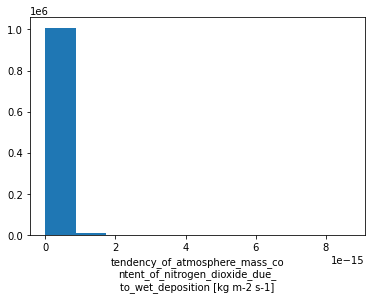

In [41]:
original_data["no2_wflux"].plot()

## Create Basemap

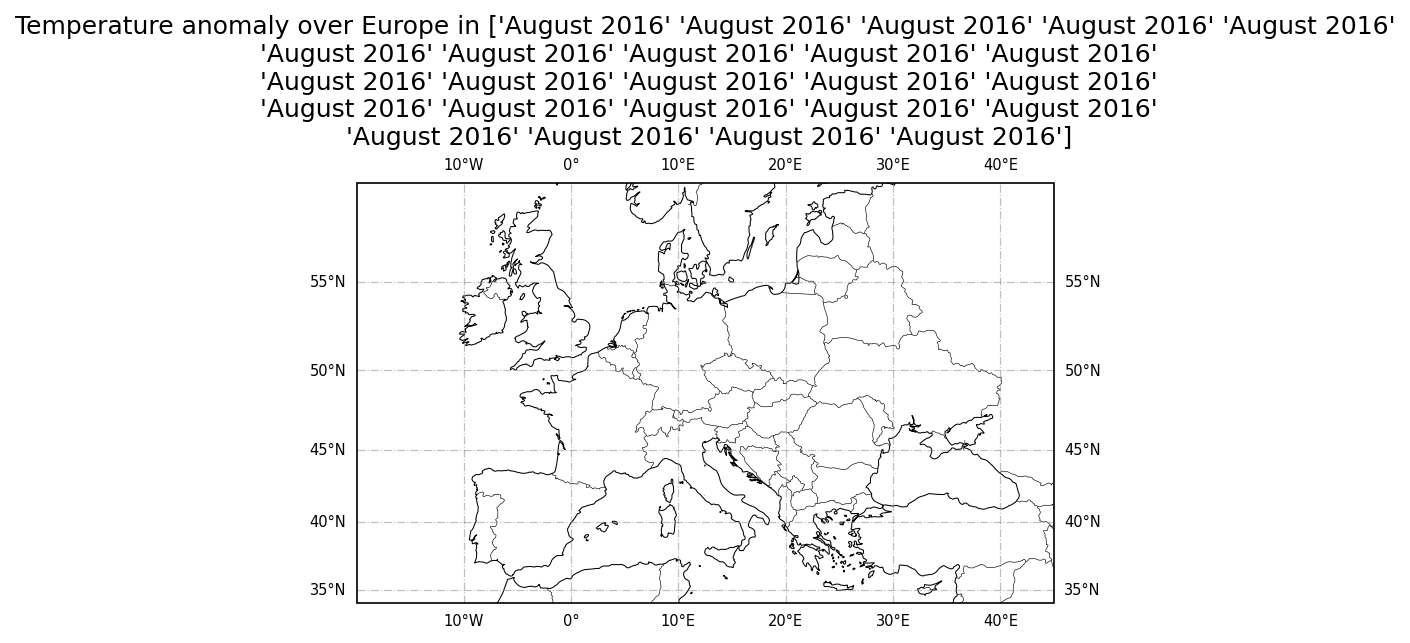

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# First we specify Coordinate Refference System for Map Projection
# We will use Mercator, which is a cylindrical, conformal projection. 
# It has bery large distortion at high latitudes, cannot 
# fully reach the polar regions.
projection = ccrs.Mercator()

# Specify CRS, that will be used to tell the code, where should our data be plotted
crs = ccrs.PlateCarree()

# Now we will create axes object having specific projection 
plt.figure(dpi=150)
ax = plt.axes(projection=projection, frameon=True)

# Draw gridlines in degrees over Mercator map
gl = ax.gridlines(crs=crs, draw_labels=True,
                  linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
gl.xlabel_style = {"size" : 7}
gl.ylabel_style = {"size" : 7}

# To plot borders and coastlines, we can use cartopy feature
import cartopy.feature as cf
ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)

# Now, we will specify extent of our map in minimum/maximum longitude/latitude
# Note that these values are specified in degrees of longitude and degrees of latitude
# However, we can specify them in any crs that we want, but we need to provide appropriate
# crs argument in ax.set_extent
lon_min = -20
lon_max = 45
lat_min = 34
lat_max = 60

# crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
plt.title(f"Temperature anomaly over Europe in {original_data.time.dt.strftime('%B %Y').values}")
plt.show()

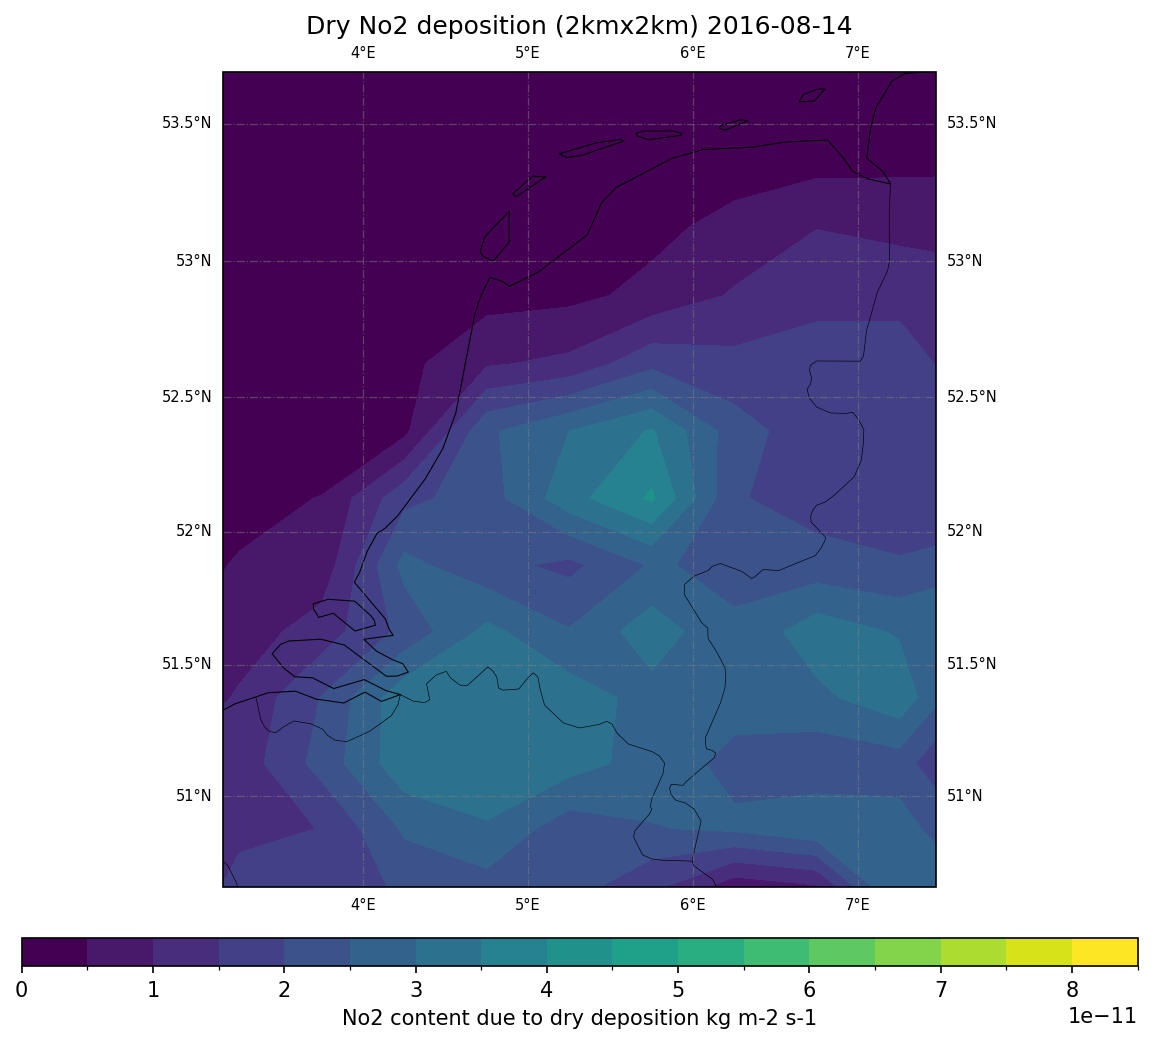

In [50]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

def plot_dataset(dataset : xr.Dataset):
    # First we specify Coordinate Refference System for Map Projection
    # We will use Mercator, which is a cylindrical, conformal projection. 
    # It has bery large distortion at high latitudes, cannot 
    # fully reach the polar regions.
    projection = ccrs.Mercator()
    # Specify CRS, that will be used to tell the code, where should our data be plotted
    crs = ccrs.PlateCarree()
    # Now we will create axes object having specific projection 
    plt.figure(figsize=(16,9), dpi=150)
    ax = plt.axes(projection=projection, frameon=True)
    # Draw gridlines in degrees over Mercator map
    gl = ax.gridlines(crs=crs, draw_labels=True,
                    linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
    gl.xlabel_style = {"size" : 7}
    gl.ylabel_style = {"size" : 7}
    # To plot borders and coastlines, we can use cartopy feature
    import cartopy.feature as cf
    ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
    ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)
    
    # Now, we will specify extent of our map in minimum/maximum longitude/latitude
    # Note that these values are specified in degrees of longitude and degrees of latitude
    # However, we can specify them in any crs that we want, but we need to provide appropriate
    # crs argument in ax.set_extent
    # crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
    lon_min = 3.15
    lon_max = 7.475
    lat_min = 50.65
    lat_max = 53.6875
   
    ##### WE ADDED THESE LINES #####
    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'No2 content due to dry deposition kg m-2 s-1'}
    dataset["no2_dflux"][2].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs=cbar_kwargs, levels=21)
    ################################
    
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
    plt.title(f"Dry No2 deposition (2kmx2km) 2016-08-14")
    plt.show()

plot_dataset(original_data)

<xarray.DataArray 'strftime' (time: 24)> Size: 192B
array(['14 August 2016 01UTC', '14 August 2016 02UTC',
       '14 August 2016 03UTC', '14 August 2016 04UTC',
       '14 August 2016 05UTC', '14 August 2016 06UTC',
       '14 August 2016 07UTC', '14 August 2016 08UTC',
       '14 August 2016 09UTC', '14 August 2016 10UTC',
       '14 August 2016 11UTC', '14 August 2016 12UTC',
       '14 August 2016 13UTC', '14 August 2016 14UTC',
       '14 August 2016 15UTC', '14 August 2016 16UTC',
       '14 August 2016 17UTC', '14 August 2016 18UTC',
       '14 August 2016 19UTC', '14 August 2016 20UTC',
       '14 August 2016 21UTC', '14 August 2016 22UTC',
       '14 August 2016 23UTC', '15 August 2016 00UTC'], dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 192B 2016-08-14T01:00:00 ... 2016-08-15

In [10]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os

def plot_dataset(dataset, save_folder):
    # First we specify Coordinate Reference System for Map Projection
    projection = ccrs.Mercator()
    crs = ccrs.PlateCarree()

    # Get the number of time steps
    num_time_steps = original_data["no2_dflux"].shape[0]

    # Loop through all time steps and save each plot
    for i in range(num_time_steps):
        plt.figure(figsize=(16,9), dpi=150)
        ax = plt.axes(projection=projection, frameon=True)
        gl = ax.gridlines(crs=crs, draw_labels=True,
                          linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
        gl.xlabel_style = {"size" : 7}
        gl.ylabel_style = {"size" : 7}

        import cartopy.feature as cf
        ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
        ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)

        lon_min = 3.15
        lon_max = 7.475
        lat_min = 50.65
        lat_max = 53.6875
        
        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'No2 content due to dry deposition kg m-2 s-1'}
        dataset["no2_dflux"][i].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs=cbar_kwargs, levels=21)

        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
        plt.title("Dry No2 deposition (2kmx2km) 2016-08-14")

        # Save the plot as a PNG file
        output_path = os.path.join(save_folder, f"output{i}.png")
        plt.savefig(output_path, bbox_inches='tight')
        plt.close()

# Specify the folder where you want to save the images
save_folder = r"C:\Users\Mahmo\OneDrive - Delft University of Technology\TU Delft\5-Presentations\Full_Presentations\POG\zoom-lotos-maps"
plot_dataset(original_data, save_folder)

In [36]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os
import numpy as np

def plot_dataset(dataset, save_folder):
    # First we specify Coordinate Reference System for Map Projection
    projection = ccrs.Mercator()
    crs = ccrs.PlateCarree()

    # Get the number of time steps
    num_time_steps = dataset["no2_dflux"].shape[0]

    # Calculate global min and max across all time steps for consistent styling
    data_min = dataset["no2_dflux"].min().item()
    data_max = dataset["no2_dflux"].max().item()

    # Define fixed contour levels based on global min and max
    levels = 21
    contour_levels = np.linspace(data_min, data_max, levels)

    # Loop through all time steps and save each plot
    for i in range(num_time_steps):
        plt.figure(figsize=(16,9), dpi=150)
        ax = plt.axes(projection=projection, frameon=True)
        gl = ax.gridlines(crs=crs, draw_labels=True,
                          linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
        gl.xlabel_style = {"size" : 7}
        gl.ylabel_style = {"size" : 7}

        import cartopy.feature as cf
        ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
        ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)

        lon_min = 3.15
        lon_max = 7.475
        lat_min = 50.65
        lat_max = 53.6875
        
        cbar_kwargs = {'orientation':'vertical', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'No2 content due to dry deposition kg m-2 s-1'}
        dataset["no2_dflux"][i].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), 
                                              cbar_kwargs=cbar_kwargs, levels=contour_levels)

        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
        plt.title(f"Dry No2 deposition (2kmx2km) {original_data.time.dt.strftime('%d %B %Y %HUTC')[i].item()}")

        # Save the plot as a PNG file
        output_path = os.path.join(save_folder, f"output{i}.png")
        plt.savefig(output_path, bbox_inches='tight')
        plt.close()

# Specify the folder where you want to save the images
save_folder = r"C:\Users\Mahmo\OneDrive - Delft University of Technology\TU Delft\5-Presentations\Full_Presentations\POG\zoom-lotos-maps"
plot_dataset(original_data, save_folder)


In [48]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os
import numpy as np

def plot_dataset(dataset, save_folder):
    # First we specify Coordinate Reference System for Map Projection
    projection = ccrs.Mercator()
    crs = ccrs.PlateCarree()

    # Get the number of time steps
    num_time_steps = dataset["no2_dflux"].shape[0]

    # Calculate global min and max across all time steps for consistent styling
    data_min = dataset["no2_dflux"].min().item()
    data_max = dataset["no2_dflux"].max().item()

    # Define fixed contour levels based on global min and max
    levels = 21
    contour_levels = np.linspace(data_min, data_max, levels)

    # Loop through all time steps and save each plot
    for i in range(num_time_steps):
        plt.figure(figsize=(16, 9), dpi=150)
        ax = plt.axes(projection=projection, frameon=True)
        
        # Clear the axis to avoid title stacking and other elements from the previous iteration
        ax.cla()
        
        gl = ax.gridlines(crs=crs, draw_labels=True,
                          linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
        gl.xlabel_style = {"size": 7}
        gl.ylabel_style = {"size": 7}

        import cartopy.feature as cf
        ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
        ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)

        lon_min = 3.15
        lon_max = 7.475
        lat_min = 50.65
        lat_max = 53.6875

        cbar_kwargs = {'orientation': 'vertical', 'shrink': 0.6, "pad": .05,
                       'aspect': 40, 'label': 'No2 content due to wet deposition kg m-2 s-1'}
        dataset["no2_dflux"][i].plot.contourf(ax=ax, transform=ccrs.PlateCarree(),
                                              cbar_kwargs=cbar_kwargs, levels=contour_levels)

        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)

        # Dynamically set the title based on the current time step
        title_text = f"Dry No2 deposition (2kmx2km) {original_data.time.dt.strftime('%d %B %Y %HUTC')[i].item()}"
        ax.set_title(title_text)

        # Save the plot as a PNG file
        output_path = os.path.join(save_folder, f"output{i}.png")
        plt.savefig(output_path, bbox_inches='tight')
        plt.close()

# Specify the folder where you want to save the images
save_folder = r"C:\Users\Mahmo\OneDrive - Delft University of Technology\TU Delft\5-Presentations\Full_Presentations\POG\zoom-lotos-maps\16"
plot_dataset(original_data, save_folder)


In [37]:
import imageio
import os

def create_gif(save_folder, gif_name, duration=0.5):
    # List all PNG files in the save folder
    images = []
    for i in range(24):  # Adjust the range based on your number of time steps
        file_name = os.path.join(save_folder, f"output{i}.png")
        images.append(imageio.imread(file_name))

    # Create the gif file
    gif_path = os.path.join(save_folder, gif_name)
    imageio.mimsave(gif_path, images, duration=duration)
    print(f"GIF saved as {gif_path}")

# Specify the folder where the PNG images are saved
save_folder = r"C:\Users\Mahmo\OneDrive - Delft University of Technology\TU Delft\5-Presentations\Full_Presentations\POG\zoom-lotos-maps"

# Create a GIF
create_gif(save_folder, 'no2_deposition.gif', duration=0.5)


C:\Users\Mahmo\AppData\Local\Temp\ipykernel_34152\1037017073.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_name))


GIF saved as C:\Users\Mahmo\OneDrive - Delft University of Technology\TU Delft\5-Presentations\Full_Presentations\POG\zoom-lotos-maps\no2_deposition.gif


In [18]:
import holoviews as hv

In [19]:
hv.extension('matplotlib')
ds = hv.Dataset(original_data.isel(time=range(24)))
images = ds.to(hv.Image, ['longitude', 'latitude']).options(fig_inches=(10, 5), colorbar=True, cmap='viridis')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

: 